### What is sklearn?



Scikit - learn (sklearn): is a machine learning package for python. Its name comes from Scipy (scientific python) Toolkit. It is a build uo of Numpy, Scipy and matplotlib.

Sklearn is 
- fast and efficient and much more preferred
- it prefers working with arrays

Advantages of Sklearn:
- incredible documentation
- Variety: Regression, Classification, Clustering, Support vector machines, Dimentionality reduction.
- Numerical stability

### Game plan for sklearn

- It is the prefered choice for most professionals(Practice)
- It is great for learning(Theory)

Game plan:
- same examples but with sklearn
- no old theory
- stats models fared quite well with pandas dataframes. However, sklearn models work with arrays. We will work with NumPy slightly more.
- we will learn Syntax and new theory (concepts)

### Simple linear regression

Import the relevant libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

Load the data

In [140]:
data = pd.read_csv('C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.01. Simple linear regression.csv')

In [141]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


#### Create the regression

Declare the dependent and independent variables

In [142]:
x = data['SAT'] # x => input/feature (the features we use to predict an outcome (SAT))
y = data['GPA'] # y => output/target (the correct values we are aiming for (GPA))

In [143]:
x.shape

(84,)

In [144]:
y.shape

(84,)

In [145]:
x_matrix = x.values.reshape(-1, 1) # recall that the -1 starts the indexing from behind
x_matrix.shape

(84, 1)

#### Regression itself

In [146]:
reg = LinearRegression()

In [147]:
# To fit our data i.e putting our data with which our model can work with
reg.fit(x_matrix, y) # where are the items in the bracket in the output?

LinearRegression()

#### R-Squared

This is used to show how well our model is performing. 

In [148]:
reg.score(x_matrix,y)

0.40600391479679765

#### Coefficients

In [149]:
reg.coef_

array([0.00165569])

#### Intercept

In [150]:
reg.intercept_

0.2750402996602803

#### Making Predictions - 

Predict(new_inputs) takes as argument the input we want to predict and outputs the prediction according to the model.

In [151]:
new_data = pd.DataFrame(data = [1740, 1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [152]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [153]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


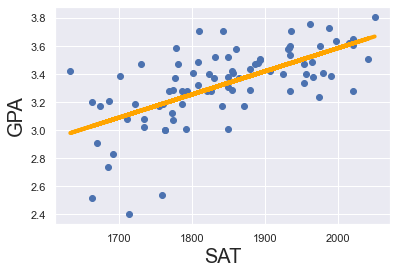

In [154]:
plt.scatter(x, y)
yhat = reg.coef_*x_matrix + reg.intercept_
#yhat = 0.0017*x1 + 0.275
fig = plt.plot(x, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Multiple linear regression

In [155]:
#Import the relevant libraries

### Load the data

In [156]:
data = pd.read_csv('C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [157]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


SAT score is good predictor o GPA
Rand1,2,3 assigns 1, 2 or 3 to each variable
Sample is the machine learning word for observation

#### Create the multiple linear regression

#### Declare the dependent and independent variables

In [158]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

#### Regression itself

In [159]:
reg = LinearRegression()
reg.fit(x,y) 

LinearRegression()

In [160]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [161]:
reg.coef_ #the output comprises the coefficient of the SAT score and the coeficient of the rand1,2,3 variable

array([ 0.00165354, -0.00826982])

In [162]:
reg.intercept_

0.29603261264909486

#### Adjusted R-squared

The R-square is the most common measure of goodness of fit. It is a universal measure that evaluates how well linear regressions fare and compare

reg.score(x,y) returns the R-squared of a linear regression. It can be used for both the simple and multiple linear regression. An adjusted R-squared lower than the R-Squared shows that some irrelevant features affecting the model have been removed

#### Calculating the R-squared

In [163]:
reg.score(x,y)

0.40668119528142843

The adjusted R-squared is much more apporpriate for a multiple linear regression. 
Unfortunately, there is no ready t use method in sklearn.

What to do when we need a function/method that is not included in a package:
- use Google
- use our mad-math skills to create our own measure

We will the later.

### Formula for Adjusted R^2

$R^2_(adj.) = 1 - (1-R^2)*\frac(n-1)(n-p-1)$

In [164]:
# n = number of observations
x.shape

(84, 2)

In [165]:
# p = number of predictors or 2
r2 = reg.score (x,y)

n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

Conclusion: the adjusted R-squared is considerably lower than the R-squared. Thus, one or more of the predictors have little or no explanatory power.

#### Feature Selection through p-values

How to detect the variables which are unneeded in a model.

It is called feature selection- it simplifies models,improves speed and prevents a seriesof unwanted issues arising from having too many features.

If a variable has a p-value > 0.05, we can disregard it.

How can we find the p-values in sklearn?

There is no built-in method we can call to get them. Therefore, we must find a work around.

One method to use is the F-regression. F-regression creates simple linear regressions of each feature and the dependent variable. With our SAT example, it will translate to 2 regressions.
1. GPA <= SAT: repredict GPA with SAT 
2. GPA <= Rand1,2,3: repredict GPA with Rand1,2,3

The method will calculate the F-statistic for each of the regressions above and return the respective p-values.

#### Feature Selection 

In [166]:
from sklearn.feature_selection import f_regression

In [167]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

First array contains the F-statistics while the second contains the p-values

In [168]:
# we are interested in the p-values
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [169]:
p_values.round(3)

array([0.   , 0.676])

Note: these are the univariate p-values reached from simple linear models. They do not reflect the interconnection of the features in our multiple linear regression. Therefore, F-regression should be used with caution as it is too simplistic for complicated problems.

#### Creating a summary table

In [170]:
# create a dataframe called reg_summary

reg_summary = pd.DataFrame(data = ['SAT', 'Rand 1,2,3'], columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [171]:
# Or we can also use code below to produce same result
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


The later is much more preferable for models with hundreds of features

In [172]:
reg_summary['Coefficient'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [173]:
reg_summary

,Features,Coefficient,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


Conclusion: Rand1,2,3 does not contribute to our model and should be removed

P-values are one of the best ways to determine if a variable is redundant but they provide no information about how useful a variable is.

#### A Note on Calculation of P-Values with sklearn

As suggested in the previous lecture, the F-regression does not take into account the interrelation of the features. A not so simple fix for that is to ammend the LinearRegression() class. Note that the results will be identical to those of StatsModels.

#### Feature Scaling

The most common problem working with numerical data is the difference in magnitudes. An easy fix fr this issue is standardization aka feature scaling or normalization.

Standardization or feature scaling is the process of transforming the data we are working with into a standard scaling. This translates to subtracting the mean and dividing by the standard devitaion. Regardless of the dataset, we will always obtain a distribution with the mean of zero and the stadard deviation of one.

#### Create the multiple linear regression

#### Declare the dependent and independent variables

In [174]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

#### Standardization

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()

#this will be used to scale our data i.e subtract the mean and divide by the standard deviation

In [177]:
# fit our input scaler. Scaler contains all standardization info
scaler.fit(x)

# this is the scaling mechanism
# in order to apply it, we must used a method called transform 
# this method will transform the unscaled inputs using the information contained in the scaler object

StandardScaler()

In [178]:
x_scaled = scaler.transform(x)

# to tansform a new data, use new_data.scaled = scaler.transform(new_data)

In [179]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

### Feature Selection through standardization

#### Creating a summary table

In [180]:
reg_summary = pd.DataFrame([['Intercept'], ['SAT'], ['Rand 1, 2, 3']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

# different output from the video

In [181]:
reg_summary

,Features,Weights
0,Intercept,0.296033
1,SAT,0.001654
2,"Rand 1, 2, 3",-0.008270


In [182]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1, 2, 3']], columns = ['Feature'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [183]:
reg_summary

,Feature,Weights
0,Bias,0.296033
1,SAT,0.001654
2,"Rand 1, 2, 3",-0.008270


The closer a weight is to 0, the smaller its impact; the bigger a weight is to 0, the bigger its impact.

#### Making predictions with standardized coefficients (weights)

In [184]:
new_data = pd.DataFrame(data = [[1700, 2],[1000, 1]], columns = ['SAT', 'Rand 1, 2, 3'])
new_data

,SAT,"Rand 1, 2, 3"
0,1700,2
1,1000,1


In [185]:
reg.predict(new_data) #our model expects values that are of the same magnitude

array([3.09051403, 1.94130459])

In [186]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-8.13493924, -1.24637147]])

In [187]:
reg.predict(new_data_scaled) # what the predictions are when we feed the new data scaled array 

array([0.29429982, 0.29288842])

#### What if we removed the 'Random 1,2,3 variable?

In [188]:
#create a new regression
reg_simple = LinearRegression() # a simple linear regression

#declare the inputs
x_simple_matrix = x_scaled[:,0].reshape(-1, 1)

#fit the regression with inputs
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [189]:
#predicting the new data
reg_simple.predict(new_data_scaled[:, 0].reshape(-1, 1))

array([3.08970998, 1.93072835])

When we apply feature scaling, it often doesnt affect the final result

#### Underfitting and overfitting

Overfitting: means that our training has focussed on the particular training set so much that it has 'missed the point'. They are super-good at modelling the data that they miss the point. 

Underfitting: means that the model has not captured the underlying logic of the data. The model provides an answer, but does not capture the underlying logic of the data. It doesnt have a strong predictive power. They are clumsy and have low accuracy

*Difference*

Underfitted model - Doesn't capture any logic(Low accuracy).


Good model - Captures the underlying logic of the dataset(High train accuracy)

Overfitted model - Captures all the noise, thus 'missed the point'(High train accuracy)
Solution: split the initial dataset into training and test(ratio 90:10 or 80:20 respectively are common)

## Training and testing

Here, we train the model on the training dataset and then test how it behaves on the tested one

#### Train Test Split

In [190]:
# How to perform a split
# import the relevant libraries
import numpy as np
from sklearn.model_selection import train_test_split

#### Generate some data we are going to split

In [191]:
a = np.arange(1,101)

In [192]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [193]:
b = np.arange(501,601)

In [194]:
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

#### Split the data

train_test_split splits arrays or matrices into random train and test subsets i.e. it takes an array and splits it to two arrays

In [195]:
train_test_split(a)

[array([ 44,  82,  14,  57,  30,  54,  24,  51,  60,  21,  69,  50,  66,
         12,  53,  19,   4,  87,  59,  39,   8,  93,  55,  73,   9,  41,
         26,  17,  78,  38,   2,  58,  89,  28,  42,  35,  74,  20,  31,
         29,  86,  90,  47,  72,  68,  71,  75,  37,  95,  94,  88,  84,
         61,  11,  34,  77,  48,  92,  76, 100,  32,  62,  83,   7,   6,
         79,  36,  85,  67,  33,  40,  98,  65,  10,  18]),
 array([22, 27, 13, 25, 52, 45, 15, 43, 97, 63, 49, 81, 99, 80, 91, 70, 16,
         5, 23, 46, 56, 64,  3,  1, 96])]

In [196]:
a_train, a_test = train_test_split(a)

#### Explore the result

In [197]:
a_train.shape, a_test.shape

((75,), (25,))

In [198]:
a_train

array([ 36,  22,   9,  50,   1,  14,  37,  49,  16,  29,  11,  44,  39,
        61,  64,  53,  60,  40,  17,  95,  87,  76,  98,  10,  48,  84,
       100,   2,  68,  72,  66,  62,  93,  59,  57,  89,  85,  78,  26,
        92,  55,  82,  80,  88,  41,  28,   6,   3,  74,  54,  65,  42,
        21,  20,  73,  75,  34,  31,  15,   8,  63,  38,  96,  47,  51,
        45,  58,  33,  52,  94,  69,  70,  12,  90,   7])

In [199]:
a_test

array([99, 43, 71, 67, 97, 35, 77,  4, 46, 25, 79, 83, 13, 91, 18, 56, 24,
       19, 32,  5, 23, 30, 86, 27, 81])

Both are shuffles. To ammend, use an argument called test_size. Sometimes, the order of the array is of utmost importance. In this case, we prefer our dataset to be split without being shuffled

In [200]:
a_train, a_test = train_test_split (a, test_size = 0.2)

In [201]:
a_train.shape, a_test.shape

((80,), (20,))

In [202]:
a_train

array([ 97,  33,   9,  98,  58,   3,  80,  87,   7,  55,   6,  53,  83,
        73,  77,  14,  61,  43,   2,  40,  62,  66,  41,  78,  63,  45,
        88,  27,  37,  69,  67,  22,  99,  19,  18,  29,  11,  64,  15,
        65,  59,  82,  91,  79,  50,  39,  49,   1,  52,  72,  86,  76,
        48,  56,  54,  20,  24, 100,  47,  89,  34,  42,  30,  25,  35,
        28,  95,   8,  51,  70,  74,  12,  17,  90,  85,  32,  93,  44,
        36,  71])

In [203]:
a_test

array([92, 81, 26, 13, 10, 23, 84, 46, 21,  4, 75,  5, 31, 68, 60, 57, 94,
       16, 38, 96])

There's an argument called shuffle which is set to true by default. Setting the to Shuffle to false will yield an intuitive result.

In [204]:
a_train, a_test = train_test_split (a, test_size = 0.2, shuffle = False)

In [205]:
a_train.shape, a_test.shape

((80,), (20,))

In [206]:
a_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [207]:
a_test

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

In practice, most of the time, we prefer to shuffle the data

In [208]:
# removing the shuffle argument
a_train, a_test = train_test_split (a, test_size = 0.2,)

In [209]:
a_train.shape, a_test.shape

((80,), (20,))

In [210]:
a_train

array([ 54,  90,  87,  49,  70,  22,  98,  65,  94,  81,  67,   8,  89,
        95,  43,  15,  60,  39,  19,  25,  21,  58,  59,  37,  27,  53,
        41,  71,  77,  79,  38,  31,  35,  32,  17,  75,  44,  99,  76,
        80,   9,  64,  47,  23,  66,  62,  86,  42,  97,  72,  33,  93,
        28,  46,   2,   4,  51,  85,  29,  68,  61,  52,  18,  55,  45,
        74,  36,  11,  20,  82,  57, 100,   3,  78,  12,  84,  16,   1,
        48,  24])

In [211]:
a_test

array([63, 83, 96,  5, 14, 73, 92, 91, 40,  7, 50, 56, 69, 34, 26, 30,  6,
       13, 88, 10])

Notice that each time you run the code, you get a different output. Each time we split the data, we get a different training and testing dataset.
We would like to have a shuffled data but shuffled in the same way every time.Fortunately, sklearn has a random_state argument.

In [212]:
a_train, a_test = train_test_split (a, test_size = 0.2, random_state = 42)

In [213]:
a_train.shape, a_test.shape

((80,), (20,))

In [214]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [215]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

Here, we got the exact same shuffle split. To get a different shuffle split, set the random_state to a different number. The split doesnt change while the number a still randomized

In [216]:
# adding b as an argument and include 2 new variables to store the returned arrays
a_train, a_test, b_train, b_test = train_test_split (a, b, test_size = 0.2, random_state = 365)

In [217]:
b_train.shape, b_test.shape

((80,), (20,))

In [218]:
b_train

array([525, 532, 599, 573, 591, 566, 503, 559, 594, 501, 508, 515, 590,
       554, 531, 520, 577, 582, 530, 535, 595, 542, 538, 507, 511, 550,
       521, 548, 502, 517, 510, 558, 568, 543, 541, 516, 588, 572, 579,
       600, 580, 539, 524, 586, 522, 523, 562, 576, 518, 547, 555, 526,
       560, 519, 571, 564, 551, 563, 565, 528, 512, 578, 513, 544, 575,
       587, 540, 504, 529, 549, 537, 557, 527, 574, 506, 545, 592, 534,
       553, 583])

In [219]:
b_test

array([509, 569, 581, 556, 533, 593, 584, 561, 546, 589, 585, 567, 597,
       505, 570, 536, 598, 596, 514, 552])

a consists of the ordered sequence number from 1 - 100 while b from 501 - 600. Therefore, we can see that 1 from a matches with 501 from be etc. When we split a and b using the train_test_split, the elements are shuffled in the same way. 

### Linear Regression Practical Example (Part 1)

Here, we will do the following:
 - clean
 - relax
 - log transformation
 - create a model
 - create dummies

In [220]:
#Importing the relevant data
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [221]:
#Loading the raw data
raw_data = pd.read_csv('C:\\Users\\user\\Documents\\Jupyter notebooks for Data Science\\1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Preprocessing

#### Exploring the descriptive statistics of the variables

In [222]:
raw_data.describe(include = 'all') 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Determining the variables of Interest

In [223]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Dealing with missing values

In [224]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [225]:
#sum the missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [226]:
data_no_mv = data.dropna(axis = 0)

In [227]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

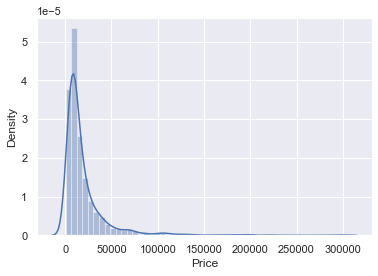

In [228]:
sns.distplot(data_no_mv['Price'])

#### Dealing with Outliers

In [229]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

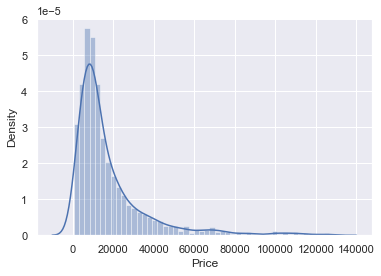

In [230]:
sns.distplot(data_1['Price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

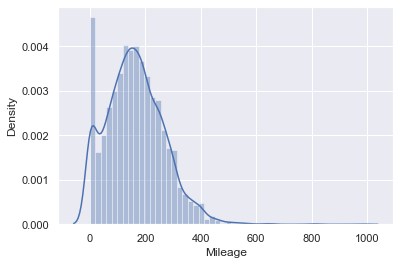

In [231]:
sns.distplot(data_no_mv['Mileage'])

In [232]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

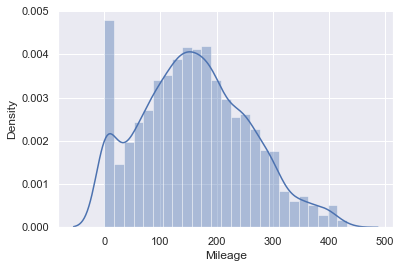

In [233]:
sns.distplot(data_2['Mileage'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

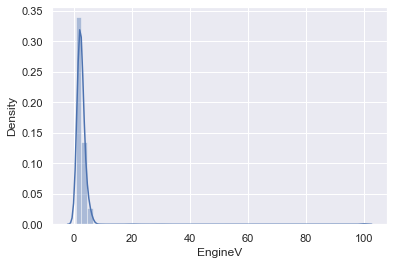

In [234]:
sns.distplot(data_no_mv['EngineV'])
# a common way to label missing values is by assigning 99.99

In [235]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

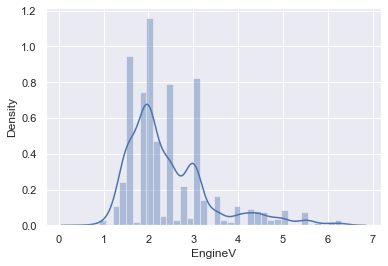

In [236]:
sns.distplot(data_3['EngineV'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

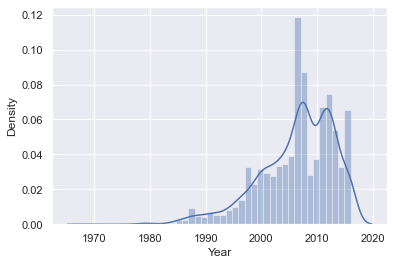

In [237]:
sns.distplot(data_no_mv['Year'])

In [238]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

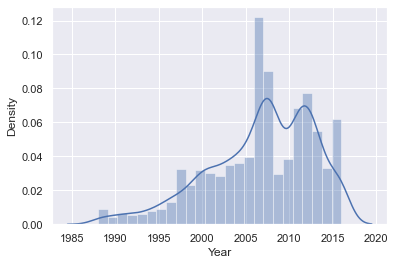

In [239]:
sns.distplot(data_4['Year'])

In [240]:
data_cleaned = data_4.reset_index(drop = True)

In [241]:
data_cleaned.describe(include = 'all')
# Overall, we've deleted approx 250 observations

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Linear Regression Practical Example (Part 2)

#### Checking the OLS assumptions

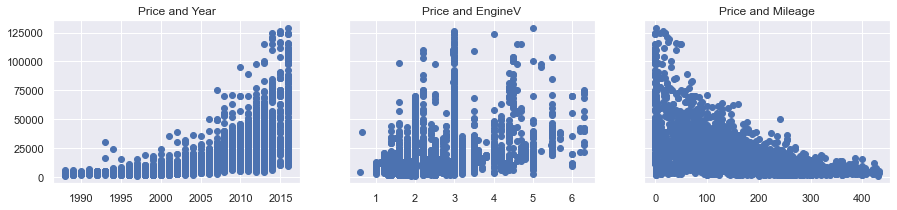

In [242]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

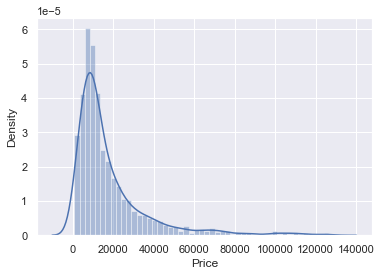

In [243]:
#Transforming one or more variables
sns.distplot(data_cleaned['Price'])

#### Relaxing the assumptions

In [244]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


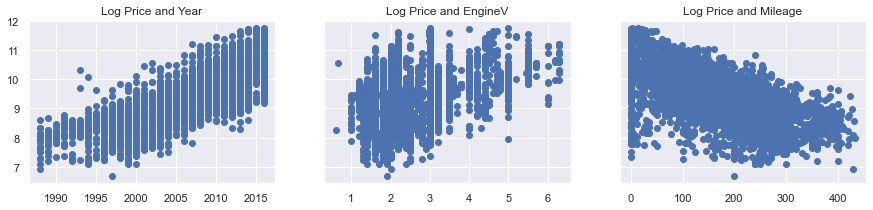

In [245]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [246]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

#### Multicollinearity

In [247]:
data_cleaned.columns.values # Year and Mileage are correlated - a reason to have some multicollinearity in our data.

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [278]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [298]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

#### Create dummy variables

To add many dummies categorically, pandas uses a shortcul called get_dummies. This spots all categorical variables and creates dummies automatically.

If we have N categories for a feature, we have to create N-1 dummies.

If we include a separate dummy variable for each category, we will introduce multicollinearity to the regression.

In [280]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [281]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Rearrange a bit

In [282]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [299]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [300]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head() 

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Linear Regression Practical Example (Part 3)

#### Linear regression model

#### Declare the inputs and the targets

In [301]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

#### Scale the data

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [305]:
# to standardize our input variables
inputs_scaled = scaler.transform(inputs)

# it is not recommended to standardize dummy variables
# Scaling has no effect on the predictive power of dummies

#### Train Test Split

In [304]:
# import the tran
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

#### Create the regression

In [289]:
reg = LinearRegression()
reg.fit(x_train, y_train) #this gives a log linear regression as our indepedent variable is a log of price

LinearRegression()

A simple way to plot the final result is to plot the predicted values against the observed values. The observed values are the targets.

In [311]:
y_hat = reg.predict(x_train)

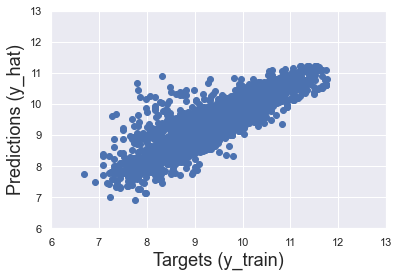

In [312]:
# Create a scatter plot of y_train, y_hat
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

If target is 7, prediction is 7. If target is 10, prediction will be 10. We can draw a 45 degrees line which shows the best possible match between our targets and predictions.
- The closer the scatter plot is to this line, the better the model.
Since target passed the 45 degrees line, our model has passed the first check.

Another check is to use the residual plot - the differences between the targets and the predictions. It refers to the distribution of the residuals.

Text(0.5, 1.0, 'Residuals PDF')

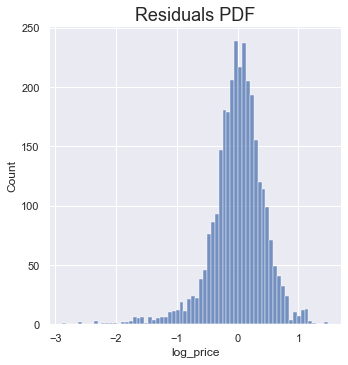

In [313]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size =18)

In [316]:
# Calculate the R-squared
reg.score(x_train, y_train)

# our model is explaining 75% of the variability of the data

0.7415645182486199

#### Finding the weights and bias

In [317]:
reg.intercept_

9.413280072375791

In [318]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [319]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


Weights interpretation:

I. Continuous variables

1. A positive weight shows that as a feature increases in value, so do the log_price and 'Price'respectively Eg. EngineV
2. A negative weight shows that as a feature increases in value, log_price and 'Price' decrease E.g Mileage

In [320]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

II. Dummy variables:
1. A positive weight shows that the respective category (Brand) is more expensive than the benchmark(Audi)
2. A negative weight shows that the respective category (Brand) is less expensive than the benchmark(Audi)

It makes no sense to compare the continuous variables with the dummies. Dummies are only compared to their respective benchmark

The bigger the weight, the bigger the impact.

### Linear Regression Practical Example (Part 5)

#### Testing

In [321]:
#start by finding the predictions
y_hat_test = reg.predict(x_test)

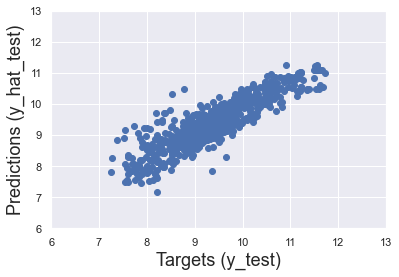

In [322]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higher prices, there is a high concentration of prices around the 45 degree line. Therefore, our model is very good at predicting prices. They are much more scattered for the lower one. 

include an additional argument called alpha - it shows the proportional capacity of the points. It takes values from 0 - 1 with 1 as default

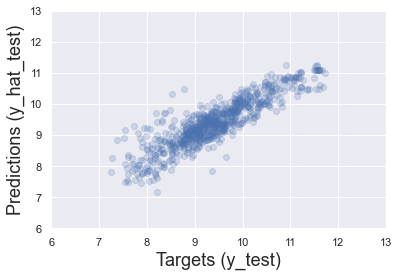

In [323]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

This gives a heatmap of sorts. The more saturated the colour, the higher the concentration of points. The paler, the lower the saturation of points. This shows a clearer indication that most of the points are indeed close to the 45 degrees line

In [324]:
# To know how the predictions are
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()                 

,Predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [325]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10650.438709,NaN
1,8041.555683,7900.0
2,6799.069945,NaN
3,7606.977689,NaN
4,11309.799759,NaN
...,...,...
769,14874.949923,6950.0
770,5735.556226,NaN
771,13623.775492,NaN
772,28096.133846,NaN


In [326]:
y_test

1192     7.740664
2752     9.487972
3752     8.999619
3256     8.764053
892      9.121509
          ...    
2044    10.292146
2957     8.575462
3133     9.814656
1369    11.134589
2594     9.287301
Name: log_price, Length: 774, dtype: float64

In [327]:
# To reset the index of y_test
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [328]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


In [331]:
df_pf['Residual'] = df_pf['Target'] = df_pf['Predictions']

In [332]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf

,Predictions,Target,Residual,Difference%
0,10650.438709,10650.438709,10650.438709,100.0
1,8041.555683,8041.555683,8041.555683,100.0
2,6799.069945,6799.069945,6799.069945,100.0
3,7606.977689,7606.977689,7606.977689,100.0
4,11309.799759,11309.799759,11309.799759,100.0
...,...,...,...,...
769,14874.949923,14874.949923,14874.949923,100.0
770,5735.556226,5735.556226,5735.556226,100.0
771,13623.775492,13623.775492,13623.775492,100.0
772,28096.133846,28096.133846,28096.133846,100.0


In [333]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.0
mean,16170.746881,16170.746881,16170.746881,100.0
std,13742.956902,13742.956902,13742.956902,0.0
min,1284.843010,1284.843010,1284.843010,100.0
25%,7489.039002,7489.039002,7489.039002,100.0
50%,11561.730997,11561.730997,11561.730997,100.0
75%,19726.158072,19726.158072,19726.158072,100.0
max,77447.771561,77447.771561,77447.771561,100.0


In [334]:
df_pf.sort_values(by = ['Difference%'])

,Predictions,Target,Residual,Difference%
0,10650.438709,10650.438709,10650.438709,100.0
510,1882.365639,1882.365639,1882.365639,100.0
511,17277.593744,17277.593744,17277.593744,100.0
512,8075.218009,8075.218009,8075.218009,100.0
513,77406.417545,77406.417545,77406.417545,100.0
...,...,...,...,...
261,65361.875403,65361.875403,65361.875403,100.0
262,12445.594928,12445.594928,12445.594928,100.0
263,11814.638886,11814.638886,11814.638886,100.0
289,58813.386622,58813.386622,58813.386622,100.0


In [335]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference%'])

,Predictions,Target,Residual,Difference%
0,10650.44,10650.44,10650.44,100.00
510,1882.37,1882.37,1882.37,100.00
511,17277.59,17277.59,17277.59,100.00
512,8075.22,8075.22,8075.22,100.00
513,77406.42,77406.42,77406.42,100.00
514,14944.37,14944.37,14944.37,100.00
515,32317.63,32317.63,32317.63,100.00
516,11659.82,11659.82,11659.82,100.00
517,9426.65,9426.65,9426.65,100.00
518,21553.01,21553.01,21553.01,100.00


How to improve our model
1. Use a different set of variables
2. Remove a bigger part of the outliers
3. Use different kinds of transformations